In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

cv2.__version__

'4.7.0'

In [3]:
file = "screen.png"

In [4]:
img = cv2.imread(file)

In [5]:
img

array([[[140, 146, 143],
        [140, 146, 143],
        [140, 146, 143],
        ...,
        [178, 185, 191],
        [178, 185, 191],
        [177, 184, 190]],

       [[140, 146, 143],
        [140, 146, 143],
        [140, 146, 143],
        ...,
        [178, 185, 191],
        [178, 185, 191],
        [177, 184, 190]],

       [[140, 146, 143],
        [140, 146, 143],
        [140, 146, 143],
        ...,
        [178, 185, 191],
        [178, 185, 191],
        [177, 184, 190]],

       ...,

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]]], dtype=uint8)

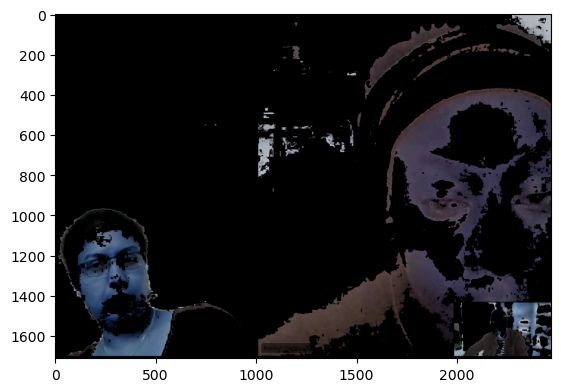

In [6]:
## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,0,0) ~ (70, 255,255)
mask1 = cv2.inRange(hsv, (10, 0, 20), (20, 255, 200))

## mask o yellow (15,0,0) ~ (36, 255, 255)
mask2 = cv2.inRange(hsv, (15,0,0), (240, 95, 90))

## final mask and masked
mask = cv2.bitwise_or(mask1, mask2)
target = cv2.bitwise_and(img, img, mask=mask)


plt.imshow(target)

In [ ]:
#empty function
def doNothing(x):
    pass

#creating a resizable window named Track Bars
cv2.namedWindow('Track Bars', cv2.WINDOW_NORMAL)

#creating track bars for gathering threshold values of red green and blue
cv2.createTrackbar('min_blue', 'Track Bars', 0, 255, doNothing)
cv2.createTrackbar('min_green', 'Track Bars', 0, 255, doNothing)
cv2.createTrackbar('min_red', 'Track Bars', 0, 255, doNothing)

cv2.createTrackbar('max_blue', 'Track Bars', 0, 255, doNothing)
cv2.createTrackbar('max_green', 'Track Bars', 0, 255, doNothing)
cv2.createTrackbar('max_red', 'Track Bars', 0, 255, doNothing)



#converting into HSV color model
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#showing both resized and hsv image in named windows
cv2.imshow('Base Image', img)
cv2.imshow('HSV Image', hsv_image)
#creating a loop to get the feedback of the changes in trackbars
while True:
    #reading the trackbar values for thresholds
    min_blue = cv2.getTrackbarPos('min_blue', 'Track Bars')
    min_green = cv2.getTrackbarPos('min_green', 'Track Bars')
    min_red = cv2.getTrackbarPos('min_red', 'Track Bars')
    
    max_blue = cv2.getTrackbarPos('max_blue', 'Track Bars')
    max_green = cv2.getTrackbarPos('max_green', 'Track Bars')
    max_red = cv2.getTrackbarPos('max_red', 'Track Bars')
    
    #using inrange function to turn on the image pixels where object threshold is matched
    mask = cv2.inRange(hsv_image, (min_blue, min_green, min_red), (max_blue, max_green, max_red))
    #showing the mask image
    cv2.imshow('Mask Image', mask)
    # checking if q key is pressed to break out of loop
    key = cv2.waitKey(25)
    if key == ord('q'):
        break

In [8]:

#printing the threshold values for usage in detection application
print(f'min_blue {min_blue}  min_green {min_green} min_red {min_red}')
print(f'max_blue {max_blue}  max_green {max_green} max_red {max_red}')
#destroying all windows
cv2.destroyAllWindows()

min_blue 0  min_green 0 min_red 0
max_blue 0  max_green 0 max_red 0
